In [9]:
import pandas as pd
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score, balanced_accuracy_score


In [10]:
base_path = Path(".").resolve().parents[0]
prediction_path = base_path / "data" / "intermediate_data" / "model_predictions" / "test_set_predictions_ATG_NRF2_ARE_CIS_up.tsv.gz"
prediction_df = pd.read_csv(prediction_path, sep="\t")


In [11]:
list_1 = ["a", "b"]
list_2 = [list_1, 1]
a,b = list_1
print(a,b)
(a,b),c = list_2

a b


In [12]:
prediction_df.head()

,endpoint,smiles,label,Random,Agglomerative clustering,Murcko scaffold,Generic scaffold,proba,prediction,trial,Split strategy,model
0,ATG_NRF2_ARE_CIS_up,BrC1CCC(Br)C(Br)CCC(Br)C(Br)CCC1Br,1,0,1,4,4,0.222222,0,0,Random,KNN
1,ATG_NRF2_ARE_CIS_up,Brc1ccc(Br)cc1,0,0,1,1,1,0.222222,0,0,Random,KNN
2,ATG_NRF2_ARE_CIS_up,Brc1ccc(Oc2ccc(Br)cc2)cc1,1,0,3,4,3,0.222222,0,0,Random,KNN
3,ATG_NRF2_ARE_CIS_up,Brc1nc2ccccc2s1,1,0,2,3,2,0.111111,0,0,Random,KNN
4,ATG_NRF2_ARE_CIS_up,C#CC(C)(O)CC(C)C,0,0,2,0,0,0.333333,0,0,Random,KNN


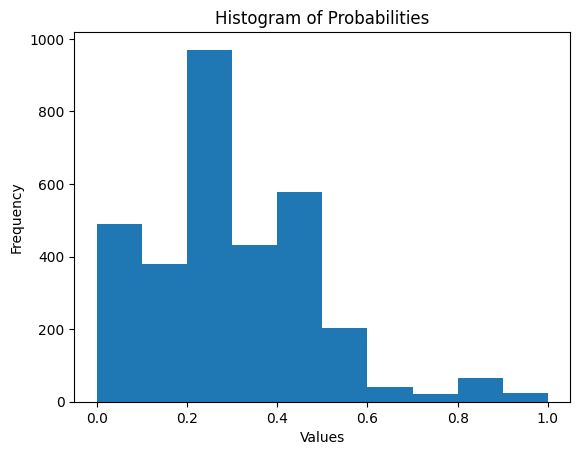

In [13]:
plt.hist(prediction_df.query("model=='KNN' & `Split strategy` !='Random'")['proba'], bins=10) 

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Probabilities') 

plt.show()

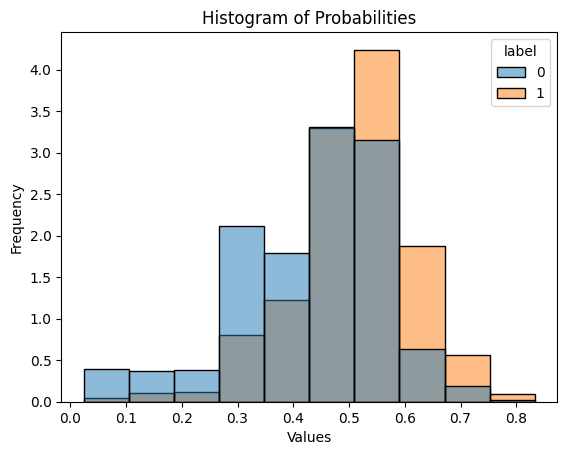

In [14]:
sns.histplot(data=prediction_df.query("model=='BRF' & `Split strategy` !='Random'"), x="proba", bins=10, hue= "label",common_norm=False,stat="density") 

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Probabilities') 

plt.show()

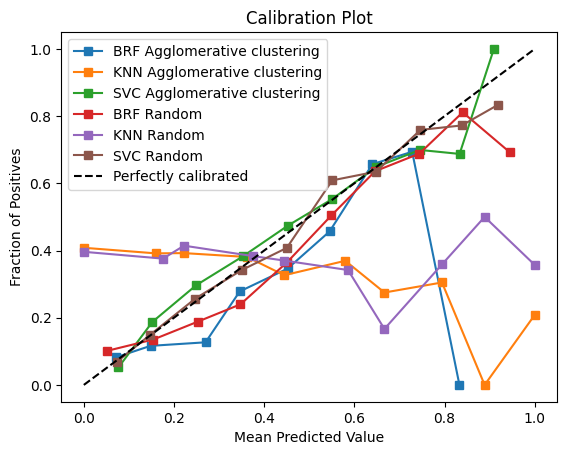

In [15]:
for (split_method, model), split_data_df in prediction_df.groupby(["Split strategy", "model"]):

    # Extract true values and predicted probabilities
    y_true = split_data_df['label']
    y_proba = split_data_df['proba']

    # Calculate calibration curve
    fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_proba, n_bins=10)

    # Plot the calibration curve
    plt.plot(mean_predicted_value, fraction_of_positives, 's-', label=f"{model} {split_method}")

# Plot the perfectly calibrated line
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')

# Add labels and title
plt.xlabel('Mean Predicted Value')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot')

# Add legend
plt.legend()

   



In [16]:
#Full data df
full_data_df = pd.read_csv("../data/imported_data/ml_ready_data.tsv", sep="\t")

# Create a pivot table
pivot_table = full_data_df.pivot_table(index='endpoint', columns='label', aggfunc='nunique', fill_value=0)
print(pivot_table)


                                 smiles     
label                                 0    1
endpoint                                    
ACEA_T47D_80hr_Negative            1222  419
ACEA_T47D_80hr_Positive            1356  277
APR_HepG2_CellCycleArrest_24h_dn    834  165
APR_HepG2_CellCycleArrest_24h_up    957   42
APR_HepG2_CellCycleArrest_72h_dn    766  230
...                                 ...  ...
Tanguay_ZF_120hpf_SOMI_up           954   38
Tanguay_ZF_120hpf_SWIM_up           959   32
Tanguay_ZF_120hpf_TRUN_up           935   56
Tanguay_ZF_120hpf_TR_up             912   79
Tanguay_ZF_120hpf_YSE_up            866  125

[617 rows x 2 columns]


In [17]:
# Calculate accuracy
accuracy = accuracy_score(prediction_df["label"], prediction_df['prediction'])
print(f"accuracy: {accuracy:0.3f}")
bal_accuracy = balanced_accuracy_score(prediction_df["label"], prediction_df['prediction'])
print(f"bal_accuracy: {bal_accuracy:0.3f}")

accuracy: 0.647
bal_accuracy: 0.609
